In [9]:
import pandas as pd

data = pd.read_csv("/home/shinichiro.saito/atmacup17/data/train.csv")

In [35]:
data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Age_bin
0,0,25,3-season skirt!,"Adorable, well-made skirt! lined and very slim...",5,1,4,20-29
1,0,39,Very cute,Love the asymmetrical hem. waist fit snugly as...,5,1,0,30-39
2,0,42,Beautiful! fruns small for typical retailer si...,I love this skirt! i wasn't sure about the mix...,5,1,5,40-49
3,0,45,NaN,I was really pleased with this skirt. the ligh...,5,1,9,40-49
4,0,57,"Unique, pretty asymmetric skirt",I saw this skirt in retailer several months ag...,5,1,1,50-59
...,...,...,...,...,...,...,...,...
9995,232,57,Runs big on top,NaN,3,1,5,50-59
9996,232,58,NaN,"I loved the dress, but just not dressy enough ...",1,1,5,50-59
9997,232,60,I was really disappointed,I was really hoping this dress would work beca...,2,0,7,60-69
9998,232,62,Too heavy,The design is beautiful but it was thick and t...,2,0,0,60-69


In [36]:
data["Clothing ID"].value_counts()

Clothing ID
226    480
83     391
148    360
164    268
65     264
      ... 
14       4
183      2
41       2
15       2
121      1
Name: count, Length: 233, dtype: int64

In [10]:
data["Recommended IND"].value_counts(normalize=True)

Recommended IND
1    0.8202
0    0.1798
Name: proportion, dtype: float64

In [17]:
data.groupby("Rating")["Recommended IND"].value_counts(normalize=True)

Rating  Recommended IND
1       0                  0.972376
        1                  0.027624
2       0                  0.943368
        1                  0.056632
3       0                  0.588710
        1                  0.411290
4       1                  0.966897
        0                  0.033103
5       1                  0.998019
        0                  0.001981
Name: proportion, dtype: float64

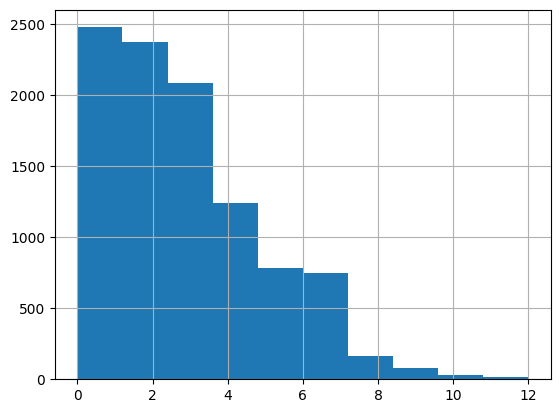

In [26]:
data["Title"].fillna("").apply(lambda x: len(x.split())).hist();

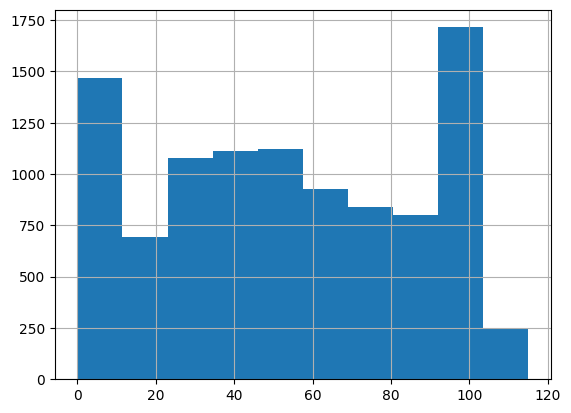

In [28]:
data["Review Text"].fillna("").apply(lambda x: len(x.split())).hist();

<Axes: >

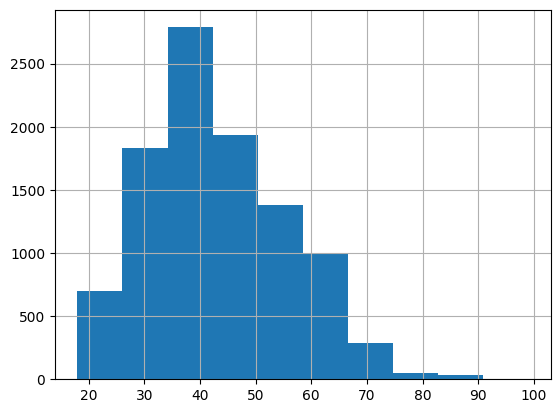

In [30]:
data["Age"].hist()

In [32]:
# 年齢を10歳ごとの範囲に区切る
bins = range(0, 101, 10)  # 0から100まで10歳ごとの範囲を指定
labels = [f"{i}-{i+9}" for i in bins[:-1]]  # ラベルを作成

# 年齢をビン分けして新しいカラムに追加
data["Age_bin"] = pd.cut(data["Age"], bins=bins, labels=labels, right=False)
data.groupby("Age_bin")["Recommended IND"].value_counts(normalize=True)

Age_bin  Recommended IND
0-9      1                  0.000000
         0                  0.000000
10-19    1                  0.888889
         0                  0.111111
20-29    1                  0.815550
         0                  0.184450
30-39    1                  0.813845
         0                  0.186155
40-49    1                  0.809776
         0                  0.190224
50-59    1                  0.833824
         0                  0.166176
60-69    1                  0.844294
         0                  0.155706
70-79    1                  0.810811
         0                  0.189189
80-89    1                  0.933333
         0                  0.066667
90-99    1                  1.000000
         0                  0.000000
Name: proportion, dtype: float64

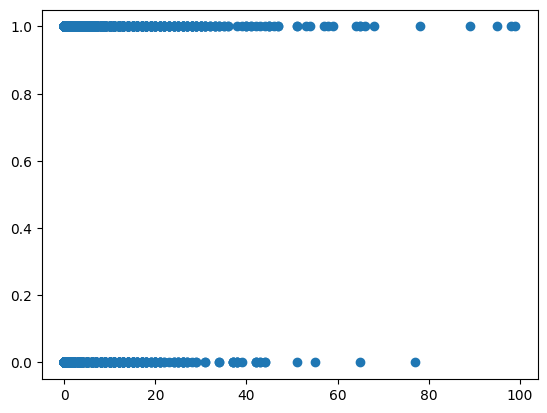

In [40]:
import matplotlib.pyplot as plt

plt.scatter(data["Positive Feedback Count"], data["Recommended IND"]);